---
# Task 2: Do an explanatory analysis for this dataset
We are performing an explanatory data analysis (EDA) on the preprocessed dataframe located in 'data/preprocessed' in order to get a better understanding of our data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme(style='whitegrid')
pd.options.mode.chained_assignment = None  # Supress warning, default='warn'

## Read Data

In [2]:
df = pd.read_pickle('../data/preprocessed/accepted_df_preprocessed.pkl')
print(f"Shape of df: {df.shape}")
df.head(5)

Shape of df: (1345310, 101)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,10.0,MORTGAGE,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,10.0,MORTGAGE,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,10.0,MORTGAGE,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
4,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,3.0,MORTGAGE,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
5,11950.0,11950.0,11950.0,36,13.44,405.18,C,C3,4.0,RENT,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


## EDA
In the following sections we explore our data set, i.e. we do EDA.

0    1076751
1     268559
Name: loan_status, dtype: int64


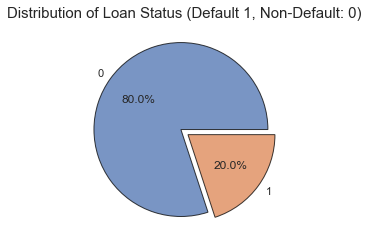

In [3]:
# Get Number of Non-Default (0) and Default (1)
loan_status_value_count = df['loan_status'].value_counts()
print(loan_status_value_count)

# Print absolut number
n_non_default = loan_status_value_count[0]
n_default = loan_status_value_count[1]

# Pie Plot Settings
plt.title("Distribution of Loan Status (Default 1, Non-Default: 0)", size = 15)
plt.pie(x=loan_status_value_count, autopct='%1.1f%%', wedgeprops={"edgecolor":"black", "alpha": 0.75},
        labels=loan_status_value_count.keys(), explode = [0.05, 0.05])
plt.show()

---
### Loan Distribution
In order to get a better understanding how the loan amount is distributed, we plot a histogram grouped by the loan status.

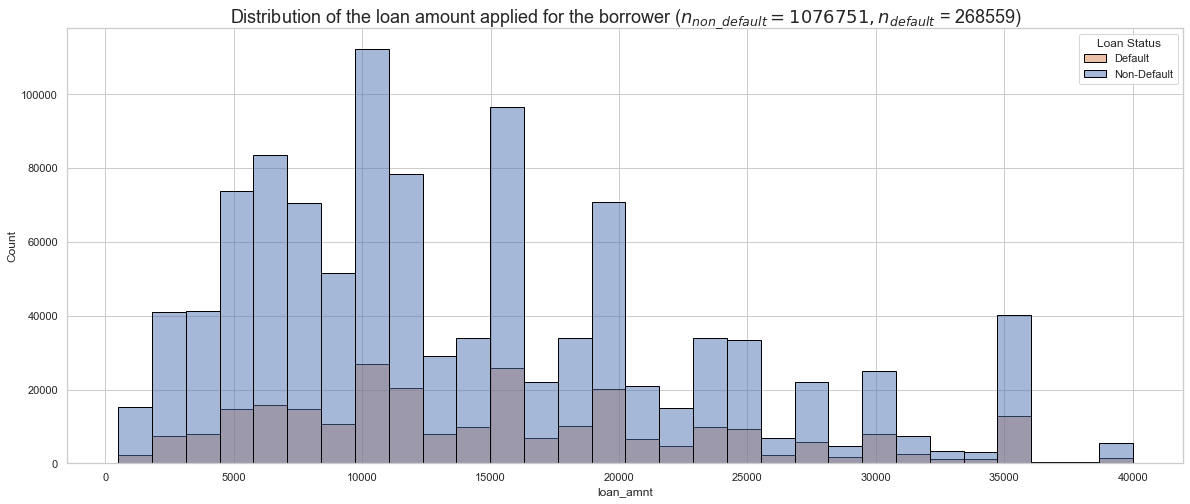

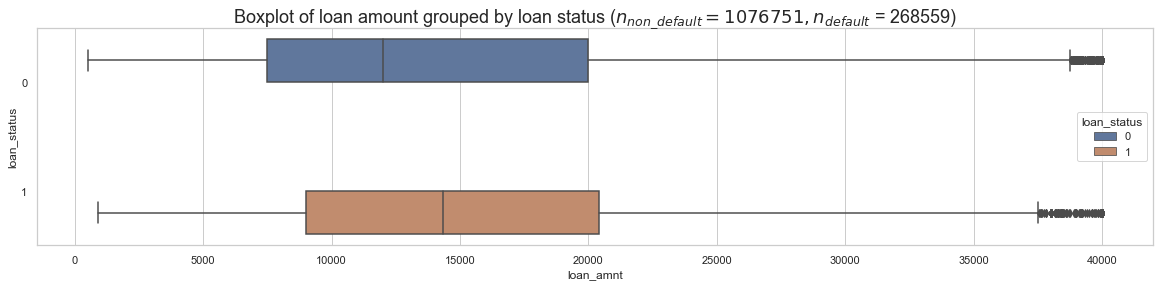

loan_amnt                                                \
                  count      mean      std     min      25%       50%   
loan_status                                                             
0            1076751.00  14134.37  8669.03  500.00  7500.00  12000.00   
1             268559.00  15565.06  8814.56  900.00  9000.00  14350.00   

                                 
                  75%       max  
loan_status                      
0            20000.00  40000.00  
1            20400.00  40000.00

In [4]:
# Plot Loan amount distribution
plt.figure(figsize=(20, 8))
plt.title(f"Distribution of the loan amount applied for the borrower "
          f"($n_{{non\_default}} = {n_non_default}, n_{{default}}$ = {n_default})", size=18)
sns.histplot(data=df, x='loan_amnt', bins=30, edgecolor='black', hue='loan_status', multiple='layer')
plt.legend(title='Loan Status', labels=['Default', 'Non-Default'])
plt.show()

# Plot boxplot
plt.figure(figsize=(20, 4))
plt.title(f"Boxplot of loan amount grouped by loan "
          f"status ($n_{{non\_default}} = {n_non_default}, n_{{default}}$ = {n_default})", size=18)
sns.boxplot(data=df, x='loan_amnt', y='loan_status', orient='h', hue='loan_status', saturation=0.6)
#plt.legend(title='Loan Status', labels=['Default', 'Non-Default'])
plt.show()

# Get descriptive statistics from loan_amnt grouped by status
df[['loan_amnt','loan_status']].groupby('loan_status').describe().applymap('{:.2f}'.format)

---
### Loan Status & LC Grade

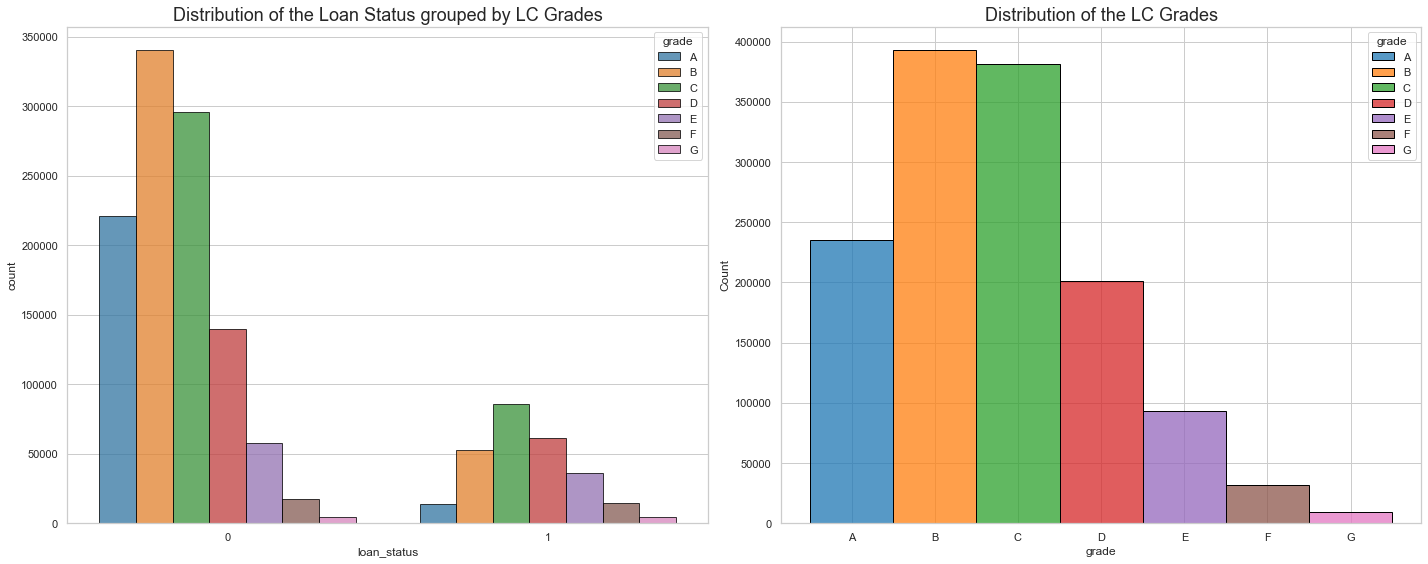

In [5]:
# Set column as category, TODO: Do this step in the preprocessing notebook
df["grade"] = df["grade"].astype("category")

# Plot settings
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=df, x="loan_status", hue="grade", edgecolor="black", palette="tab10", ax=axs[0], alpha=0.75)
sns.histplot(data=df, x="grade", edgecolor="black", palette="tab10", hue="grade", ax=axs[1], alpha=0.75)
axs[0].set_title("Distribution of the Loan Status grouped by LC Grades", size=18)
axs[1].set_title("Distribution of the LC Grades", size=18)
fig.tight_layout()
plt.show()

---
### Annual Income and Address State
Plot shows the average annual income of our borrowers grouped by the state they live in.

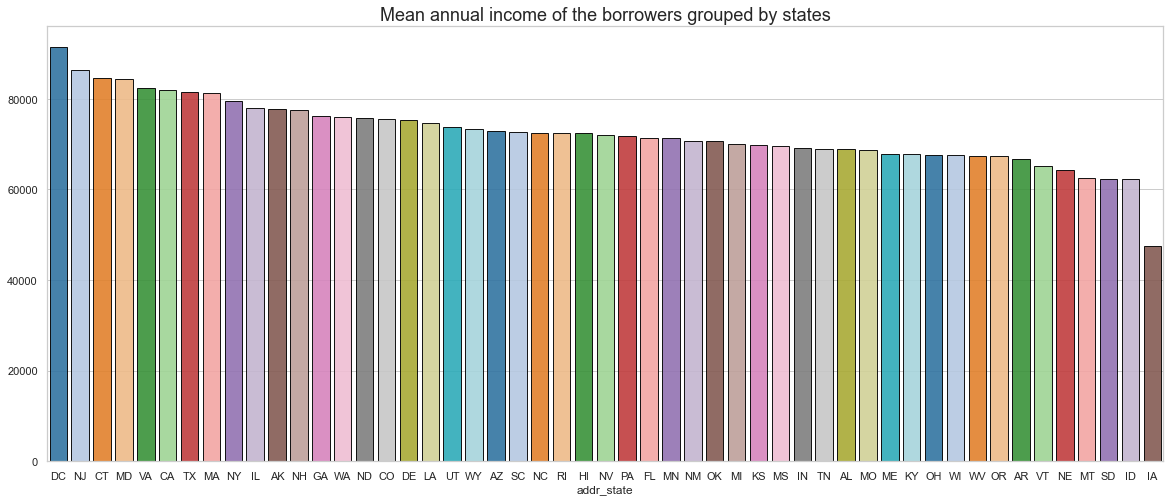

In [6]:
# Get mean of annual income grouped by addr_state
mean_annual_income_addr_state_df = df.groupby('addr_state')['annual_inc'].mean().sort_values(ascending=False)
# Attention: Address State 'IA' has only 7 observations, while the rest has at least 2000.

# Plot settings
plt.figure(figsize=(20,8))
plt.title("Mean annual income of the borrowers grouped by states", size=18)
sns.barplot(x = mean_annual_income_addr_state_df.keys(),
            y = mean_annual_income_addr_state_df.values,
            palette="tab20",
            alpha=0.9,
            edgecolor="black")
plt.show()

---
## Interest Rate Analysis
We can clearly see that defaulted lenders have a significantly higher interest rate than non-defaulted lenders.

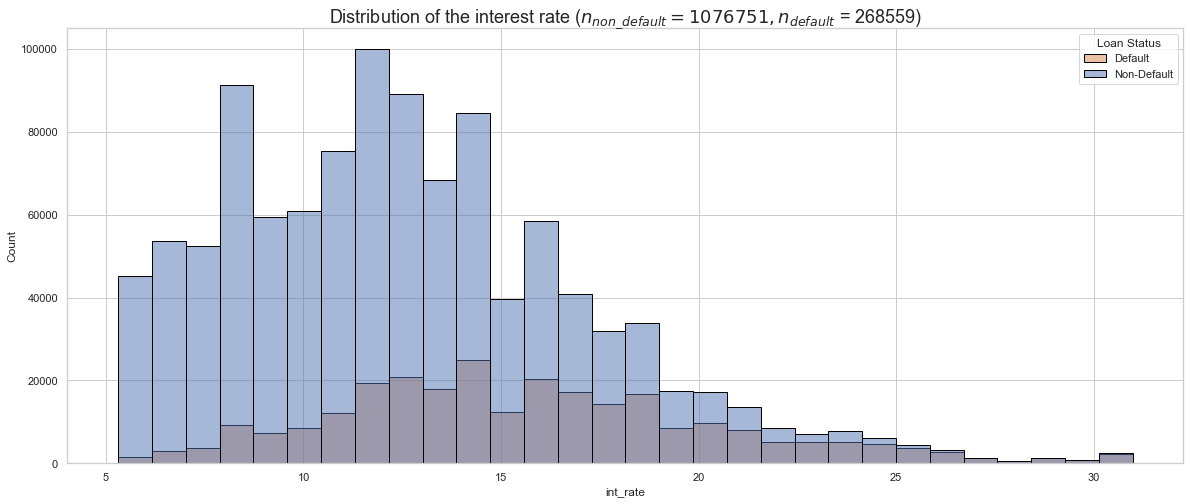

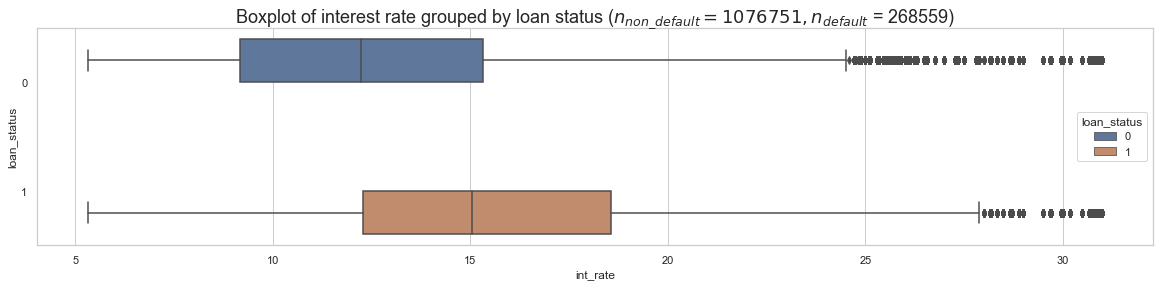

int_rate                                               
                  count   mean   std   min    25%    50%    75%    max
loan_status                                                           
0            1076751.00  12.62  4.53  5.31   9.17  12.23  15.31  30.99
1             268559.00  15.71  4.91  5.31  12.29  15.05  18.55  30.99

In [7]:
# Plot Loan amount distribution
plt.figure(figsize=(20, 8))
plt.title(f"Distribution of the interest rate "
          f"($n_{{non\_default}} = {n_non_default}, n_{{default}}$ = {n_default})", size=18)
sns.histplot(data=df, x='int_rate', bins=30, edgecolor='black', hue='loan_status', multiple='layer')
plt.legend(title='Loan Status', labels=['Default', 'Non-Default'])
plt.show()

# Plot boxplot
plt.figure(figsize=(20, 4))
plt.title(f"Boxplot of interest rate grouped by loan "
          f"status ($n_{{non\_default}} = {n_non_default}, n_{{default}}$ = {n_default})", size=18)
sns.boxplot(data=df, x='int_rate', y='loan_status', orient='h', hue='loan_status', saturation=0.6)
plt.show()

# Get descriptive statistics from int rate grouped by status
df[['int_rate','loan_status']].groupby('loan_status').describe().applymap('{:.2f}'.format)

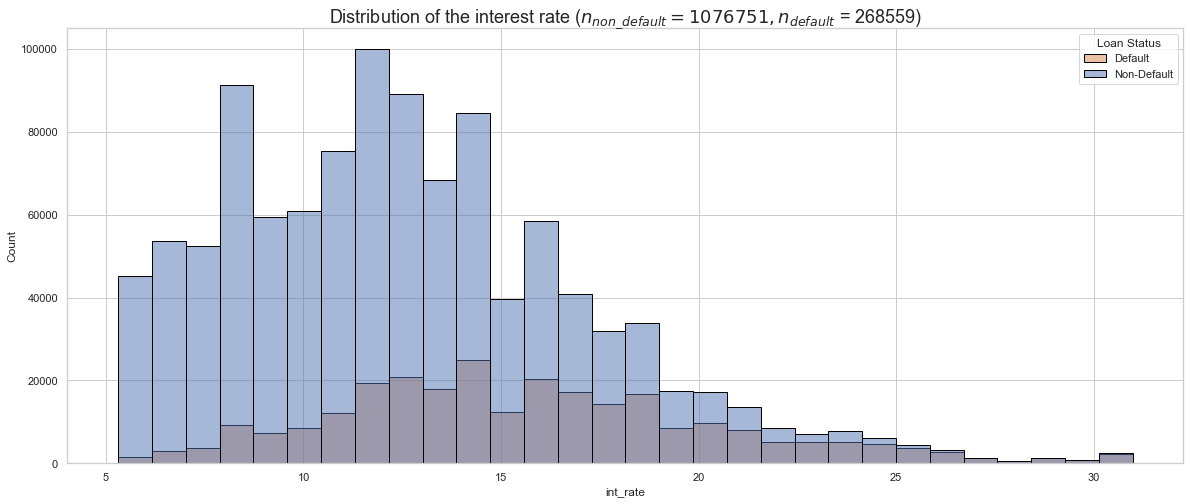

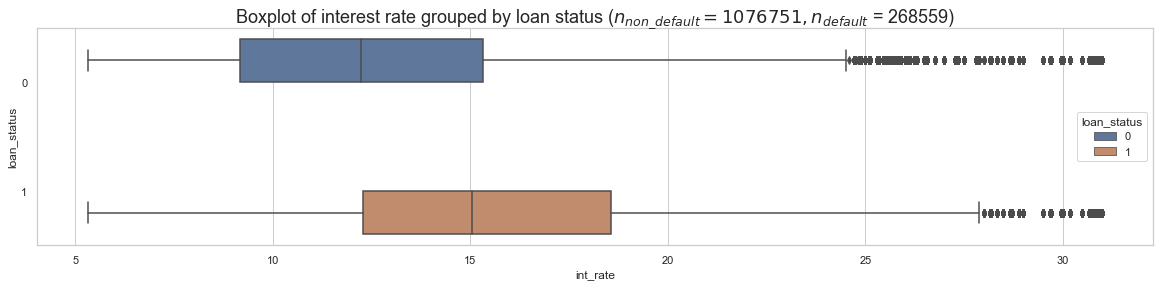

int_rate                                               
                  count   mean   std   min    25%    50%    75%    max
loan_status                                                           
0            1076751.00  12.62  4.53  5.31   9.17  12.23  15.31  30.99
1             268559.00  15.71  4.91  5.31  12.29  15.05  18.55  30.99

In [8]:
# Plot Loan amount distribution
plt.figure(figsize=(20, 8))
plt.title(f"Distribution of the interest rate "
          f"($n_{{non\_default}} = {n_non_default}, n_{{default}}$ = {n_default})", size=18)
sns.histplot(data=df, x='int_rate', bins=30, edgecolor='black', hue='loan_status', multiple='layer')
plt.legend(title='Loan Status', labels=['Default', 'Non-Default'])
plt.show()

# Plot boxplot
plt.figure(figsize=(20, 4))
plt.title(f"Boxplot of interest rate grouped by loan "
          f"status ($n_{{non\_default}} = {n_non_default}, n_{{default}}$ = {n_default})", size=18)
sns.boxplot(data=df, x='int_rate', y='loan_status', orient='h', hue='loan_status', saturation=0.6)
plt.show()

# Get descriptive statistics from int rate grouped by status
df[['int_rate','loan_status']].groupby('loan_status').describe().applymap('{:.2f}'.format)